In [2]:
#+.+
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression

Slope (m): 0.0007411286831999999
Intercept (b): 1.1075885333333333e-06
Slope (m): 0.0009211836617625307
Intercept (b): 1.38086158852192e-06
Slope (m): 0.0009649274710984056
Intercept (b): 1.4514402059639369e-06
Slope (m): 0.000975554891798775
Intercept (b): 1.4727748179523466e-06
Slope (m): 0.0009781367854709516
Intercept (b): 1.4821457455417697e-06
Slope (m): 0.0009787640425469163
Intercept (b): 1.488610130619446e-06
Slope (m): 0.0009789164265400056
Intercept (b): 1.4943683785693695e-06
Slope (m): 0.0009789534415456963
Intercept (b): 1.49995507126231e-06
Slope (m): 0.0009789624280028492
Intercept (b): 1.5055000837561256e-06
Slope (m): 0.0009789646050084274
Intercept (b): 1.5110349688055506e-06
Slope (m): 0.0009789651276782252
Intercept (b): 1.5165673920574592e-06
Slope (m): 0.0009789652484321224
Intercept (b): 1.5220992158577077e-06
Slope (m): 0.0009789652715417622
Intercept (b): 1.5276308926576214e-06
Slope (m): 0.0009789652709290256
Intercept (b): 1.5331625323788895e-06
Slope (m): 0

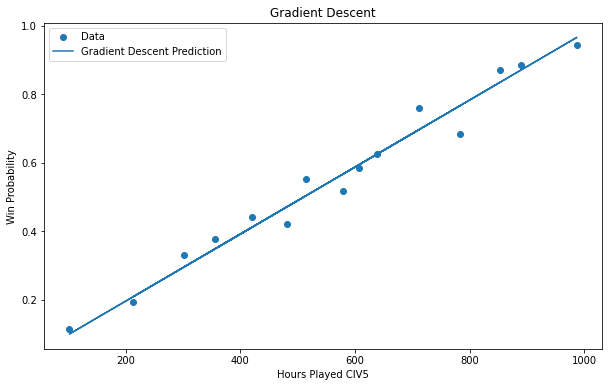

In [24]:
#gradient descent
x=np.array([784,302,514,102,421,213,639,890,987,482,356,712,579,608,854]) #hours played CIV5
y=np.array([0.685412,0.329387,0.552109,0.114783,0.441053,0.193281,0.627106,0.884732,0.943981,0.421876,0.378213,0.759842,0.517209,0.585732,0.872198]) #Win percentage

n=len(x)
alpha=0.000001
m=0
b=0
tol=1e-3
maxiterations=10000

for _ in range(maxiterations):
    y_pred=m*x+b
    mse=(1/n)*sum((ypred-y)**2) 
    dm=(2/n)*np.dot(x,(y_pred-y))
    db=(2/n)*np.sum(y_pred-y)      
    m-=alpha*dm
    b-=alpha*db
    
    print("Slope (m):", m)
    print("Intercept (b):", b)
    
    if np.abs(mse-(1/n)*sum((ypred-y)**2)/mse)<tol:
        print('converged') 
        break

fig,ax=plt.subplots(1,figsize=(10,6))
ax.scatter(x,y,label="Data")
ax.plot(x,m*x+b,label="Gradient Descent Prediction")
ax.set_title("Gradient Descent")
ax.set_xlabel("Hours Played CIV5")
ax.set_ylabel("Win Probability")
ax.legend()  

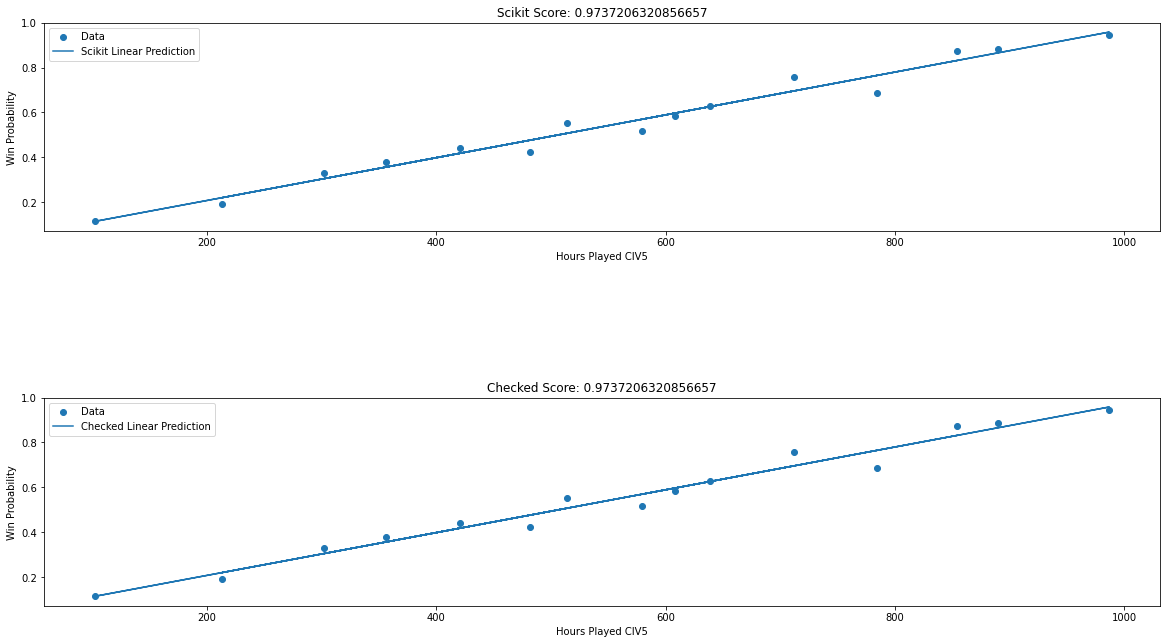

In [4]:
#Using Scikit for basic Linear Regression
x=np.array([784,302,514,102,421,213,639,890,987,482,356,712,579,608,854]).reshape((-1,1)) #hours played CIV5
y=np.array([0.685412,0.329387,0.552109,0.114783,0.441053,0.193281,0.627106,0.884732,0.943981,0.421876,0.378213,0.759842,0.517209,0.585732,0.872198]) #Win percentage

model=LinearRegression().fit(x,y)
r2=model.score(x,y)
ypred=model.predict(x)

def linear_prediction(x): 
    return model.intercept_ + model.coef_*x

y_preds=[]
u=0
for i in range(len(y)): 
    y_pred=linear_prediction(x[i][0])
    y_preds.append(y_pred)  
    u+=(y[i]-y_pred)**2
v=0
for i in range(len(y)):
    v+=(y[i]-y.mean())**2

r21=1-(u/v)


fig,(ax,ax1)=plt.subplots(2,figsize=(20,12))
ax.scatter(x,y,label="Data")
ax.plot(x,ypred,label="Scikit Linear Prediction")
ax.set_title("Scikit Score: {}".format(r2))
ax.set_xlabel("Hours Played CIV5")
ax.set_ylabel("Win Probability")
ax.legend()
ax1.scatter(x,y,label="Data")
ax1.plot(x,linear_prediction(x),label="Checked Linear Prediction")
ax1.set_title("Checked Score: {}".format(r21[0]))
ax1.set_xlabel("Hours Played CIV5")
ax1.set_ylabel("Win Probability")
ax1.legend()
plt.subplots_adjust(top=0.80,hspace=0.8)
plt.show()